In [1]:
#IMPORTANDO LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("df_definitivo.csv", index_col=0)
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome_$',
       'monthlyrate_$', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'datebirth', 'salary', 'remotework',
       'generation'],
      dtype='object')

# Contexto

### Generación

In [3]:
satisfaccion_generacion = df.groupby('generation')['jobsatisfaction'].mean().reset_index()

satisfaccion_generacion

,generation,jobsatisfaction
0,Baby Boomers,2.866667
1,Gen X,2.740099
2,Gen Z,2.737143
3,Millennials,2.736275


In [ ]:
#df_activos.groupby('education')['attrition'].count().reset_index()

In [ ]:
df_attrition_no = df.loc[df['attrition'] == 'No']
df_attrition_no

In [ ]:
satisfaccion_generacion = df.loc[df['attrition'] == 'No'].groupby('generation')['jobsatisfaction'].mean().reset_index()
print(satisfaccion_generacion)

In [ ]:
# gen y trabajo remoto
# los baby boomers tiene mas satisfaccion cuando trabajan presencial?

plt.figure(figsize=(8,5))
sns.barplot(data=df,
    x='generation',
    y='jobsatisfaction', hue='remotework',
    palette='pastel');

- Hay que investigar si en Research Director y Sales Representative los Baby Boomers estan insatisfechos o si no hay baby boomers en estes job roles 
- lo mismo del anterior para la Gen Z en Research Director


In [ ]:
# no hay Baby Boomers 
# no hay Gen Z
df.groupby(['jobrole', 'generation']).size().reset_index()

- Overtime - Analisar variable con los datos que tengo (60%) - Si tienen 60% dos datos podemos hacer inferencia en el futuro

# Educacación 

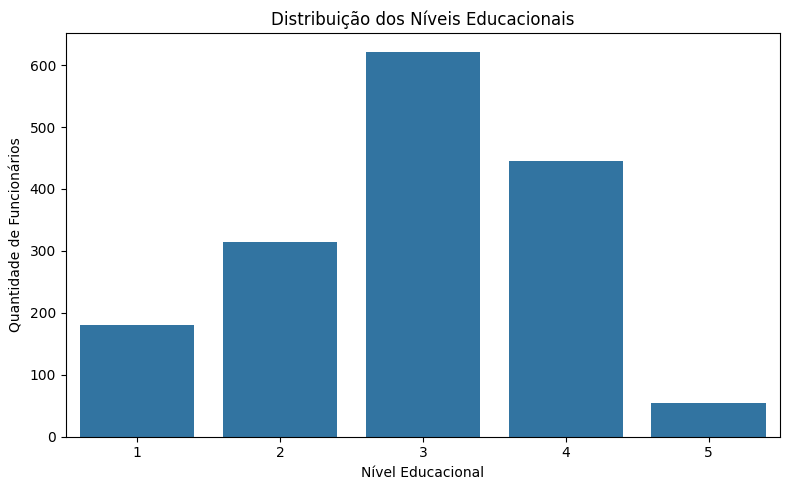

In [4]:
educ_counts = df['education'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=educ_counts.index, y=educ_counts.values)
plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade de Funcionários')
plt.title('Distribuição dos Níveis Educacionais')
plt.tight_layout()
plt.show()

## Departamiento 

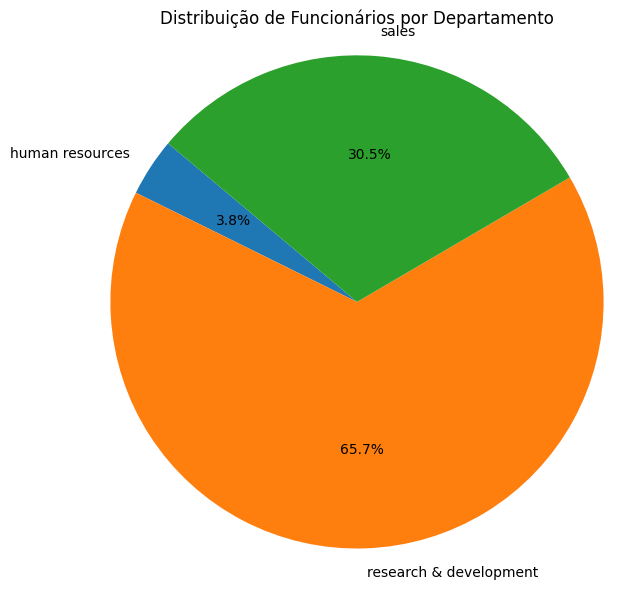

In [5]:
# Departamento - groupby e gráfico de pizza
dept_counts = df.groupby('department').size()
plt.figure(figsize=(7, 7))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Funcionários por Departamento')
plt.axis('equal')
plt.show()

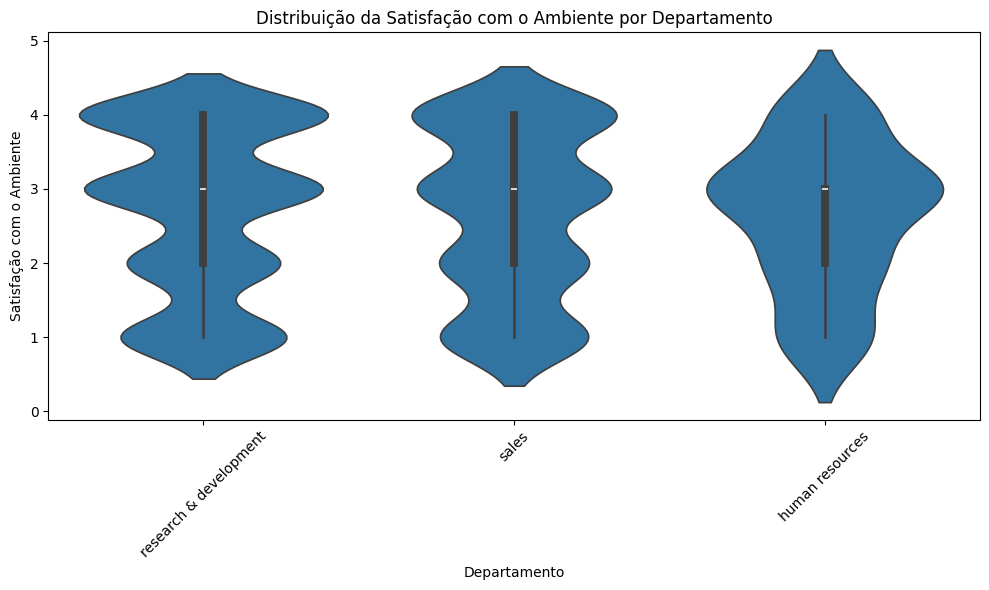

In [7]:
# Satisfação no ambiente de trabalho por departamento
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='department', y='environmentsatisfaction', inner='box')
plt.xticks(rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Satisfação com o Ambiente')
plt.title('Distribuição da Satisfação com o Ambiente por Departamento')
plt.tight_layout()
plt.show()

## Overtime

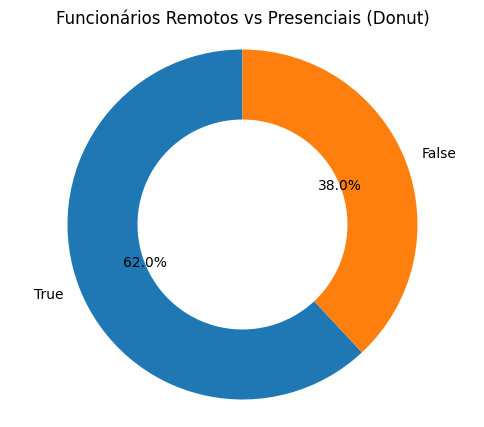

In [6]:
# Equilíbrio entre vida pessoal e trabalho - remoto vs presencial
remote_counts = df['remotework'].value_counts()
plt.figure(figsize=(6, 5))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Funcionários Remotos vs Presenciais (Donut)')
plt.axis('equal')
plt.show()